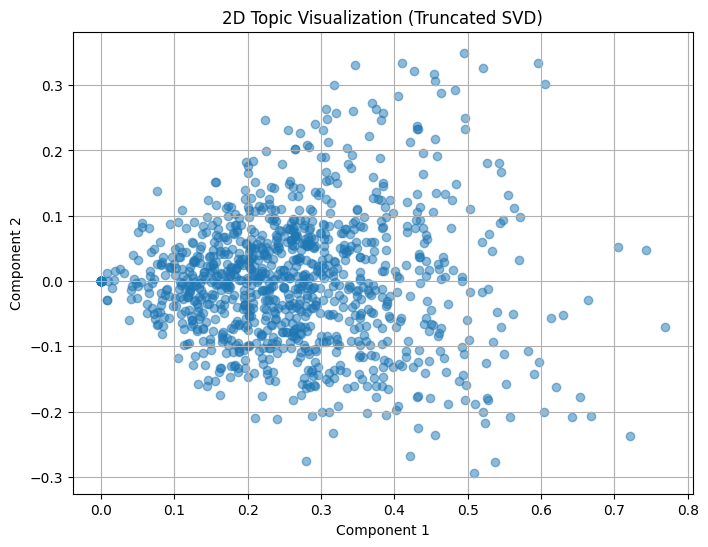

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Step 1: Load the dataset (2 categories to keep it fast)
newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=['alt.atheism', 'sci.space'],
    remove=('headers', 'footers', 'quotes')  # optional: cleans up text
)

# Step 2: Build text processing pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

# Step 3: Transform text to TF-IDF feature matrix
X = pipeline.fit_transform(newsgroups_train.data)

# Step 4: Reduce dimensionality for visualization
svd = TruncatedSVD(n_components=2, random_state=42).fit(X)
data2D = svd.transform(X)

# Step 5: Plot the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(data2D[:, 0], data2D[:, 1], alpha=0.5)
plt.title("2D Topic Visualization (Truncated SVD)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

